<a href="https://colab.research.google.com/github/ojeifoissy/Geospatial-data-Analysis/blob/main/02_Introduction_to_GeoPandas.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Lesson 2. Introduction to Geopandas

In this lesson we'll learn about a package that is core to using geospatial data in Python. We'll go through the structure of the data (it's not too different from regular DataFrames!), geometries, shapefiles, and how to save your hard work.

- 2.1 What is GeoPandas?
- 2.2 Read in a shapefile
- 2.3 Explore the GeoDataFrame
- 2.4 Plot the GeoDataFrame
- 2.5 Subset the GeoDataFrame
- 2.6 Save your data
- 2.7 Recap
- **Exercise**: IO, Manipulation, and Mapping

<br>
<font color='grey'>
    <b>Instructor Notes</b>

- Datasets used
    - 'notebook_data/california_counties/CaliforniaCounties.shp'
    - 'notebook_data/census/Places/cb_2018_06_place_500k.zip'

- Expected time to complete
    - Lecture + Questions: 30 minutes
    - Exercises: 5 minutes
</font>

## 2.1 What is GeoPandas?

### GeoPandas and related Geospatial Packages

[GeoPandas](http://geopandas.org/) is a relatively new package that makes it easier to work with geospatial data in Python. In the last few years it has grown more powerful and stable. This is really great because previously it was quite complex to work with geospatial data in Python. GeoPandas is now the go-to package for working with `vector` geospatial data in Python. 

> **Protip**: If you work with `raster` data you will want to checkout the [rasterio](https://rasterio.readthedocs.io/en/latest/) package. We will not cover raster data in this tutorial.

### GeoPandas = pandas + geo
GeoPandas gives you access to all of the functionality of [pandas](https://pandas.pydata.org/), which is the primary data analysis tool for working with tabular data in Python. GeoPandas extends pandas with attributes and methods for working with geospatial data.




### Import Libraries

Let's start by importing the libraries that we will use.

In [3]:
import pandas as pd
import geopandas as gpd

import matplotlib # base python plotting library
import matplotlib.pyplot as plt # submodule of matplotlib

# To display plots, maps, charts etc in the notebook
%matplotlib inline  

In [2]:
pip install geopandas

     |████████████████████████████████| 1.0 MB 7.5 MB/s 
     |████████████████████████████████| 16.7 MB 34.3 MB/s 
     |████████████████████████████████| 6.3 MB 44.2 MB/s 


## 2.2 Read in a shapefile

As we discussed in the initial geospatial overview, a *shapefile* is one type of geospatial data that holds vector data. 

> To learn more about ESRI Shapefiles, this is a good place to start: [ESRI Shapefile Wiki Page](https://en.wikipedia.org/wiki/Shapefile) 

The tricky thing to remember about shapefiles is that they're actually a collection of 3 to 9+ files together. Here's a list of all the files that can make up a shapefile:
 
>`shp`: The main file that stores the feature geometry
>
>`shx`: The index file that stores the index of the feature geometry  
>
>`dbf`: The dBASE table that stores the attribute information of features 
>
>`prj`: The file that stores the coordinate system information. (should be required!)
>
>`xml`: Metadata —Stores information about the shapefile.
>
>`cpg`: Specifies the code page for identifying the character set to be used.

But it remains the most commonly used file format for vector spatial data, and it's really easy to visualize in one go!

Let's try it out with California counties, and use `geopandas` for the first time. `gpd.read_file` is a flexible function that let's you read in many different types of geospatial data.

In [5]:
# Read in the counties shapefile
counties = gpd.read_file('/content/CaliforniaCounties.shp')

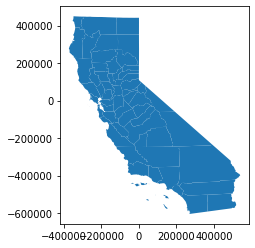

In [6]:
# Plot out California counties
counties.plot()

Bam! Amazing! We're off to a running start.

## 2.3 Explore the GeoDataFrame

Before we get in too deep, let's discuss what a *GeoDataFrame* is and how it's different from `pandas` *DataFrames*.

### The GeoPandas GeoDataFrame

A [GeoPandas GeoDataFrame](https://geopandas.org/data_structures.html#geodataframe), or `gdf` for short, is just like a pandas dataframe (`df`) but with an extra geometry column and methods & attributes that work on that column. I repeat because it's important:

> `A GeoPandas GeoDataFrame is a pandas DataFrame with a geometry column and methods & attributes that work on that column.`

> This means all the methods and attributes of a pandas DataFrame also work on a Geopandas GeoDataFrame!!

With that in mind, let's start exploring out dataframe just like we would do in `pandas`.

In [7]:
# Find the number of rows and columns in counties
counties.shape

(58, 59)

In [8]:
# Look at the first couple of rows in our geodataframe
counties.head()

,FID_,NAME,STATE_NAME,POP2010,POP10_SQMI,POP2012,POP12_SQMI,WHITE,BLACK,AMERI_ES,ASIAN,HAWN_PI,HISPANIC,OTHER,MULT_RACE,MALES,FEMALES,AGE_UNDER5,AGE_5_9,AGE_10_14,AGE_15_19,AGE_20_24,AGE_25_34,AGE_35_44,AGE_45_54,AGE_55_64,AGE_65_74,AGE_75_84,AGE_85_UP,MED_AGE,MED_AGE_M,MED_AGE_F,HOUSEHOLDS,AVE_HH_SZ,HSEHLD_1_M,HSEHLD_1_F,MARHH_CHD,MARHH_NO_C,MHH_CHILD,FHH_CHILD,FAMILIES,AVE_FAM_SZ,HSE_UNITS,VACANT,OWNER_OCC,RENTER_OCC,NO_FARMS07,AVG_SIZE07,CROP_ACR07,AVG_SALE07,SQMI,CountyFIPS,NEIGHBORS,PopNeigh,NEIGHBOR_1,PopNeigh_1,NEIGHBOR_2,PopNeigh_2,geometry
0,0,Kern,California,839631,102.9,851089,104.282870,499766,48921,12676,34846,1252,413033,204314,37856,433108,406523,72885,68694,68473,72493,65339,122046,108500,108479,77285,43502,23473,8462,30.7,30.2,31.4,254610,3.15,23580,25629,74254,58472,12615,28989,191739,3.61,284367,29757,152828,101782,2117.0,1116.0,942827.0,1513.53,8161.35,06103,"San Bernardino,Tulare,Inyo",2495935,None,None,None,None,"POLYGON ((193446.035 -244342.585, 194033.795 -..."
1,0,Kings,California,152982,109.9,155039,111.427421,83027,11014,2562,5620,271,77866,42996,7492,86344,66638,12877,11564,11324,11356,13158,25589,21878,20282,12924,6844,3809,1377,31.1,31.9,30.0,41233,3.19,3313,3884,12993,9299,2115,4818,31939,3.59,43867,2634,22329,18904,1129.0,603.0,512870.0,1203.20,1391.39,06089,"Fresno,Kern,Tulare",2212260,None,None,None,None,"POLYGON ((12524.028 -179431.328, 12358.142 -17..."
2,0,Lake,California,64665,48.6,65253,49.082334,52033,1232,2049,724,108,11088,5455,3064,32469,32196,3633,3574,3888,4190,3362,6603,7095,10255,10625,6553,3502,1385,45.0,43.8,45.9,26548,2.39,3913,3970,4061,7381,926,2051,16255,2.94,35492,8944,17472,9076,845.0,147.0,28997.0,72.31,1329.46,06106,None,0,None,None,None,None,"MULTIPOLYGON (((-240632.150 93056.104, -240669..."
3,0,Lassen,California,34895,7.4,35039,7.422856,25532,2834,1234,356,165,6117,3562,1212,22416,12479,1625,1595,1853,2107,2831,6337,5513,5447,4113,1984,1041,449,37.0,35.5,40.9,10058,2.50,1348,1231,2068,3094,413,710,6800,2.98,12710,2652,6590,3468,459.0,1000.0,82567.0,120.92,4720.42,06086,None,0,None,None,None,None,"POLYGON ((-45364.032 352060.633, -45248.844 35..."
4,0,Los Angeles,California,9818605,2402.3,9904341,2423.264150,4936599,856874,72828,1346865,26094,4687889,2140632,438713,4839654,4978951,645793,633690,678845,753630,752788,1475731,1430326,1368947,1013156,568470,345603,151626,34.8,33.6,35.9,3241204,2.98,360530,424398,790374,690291,115984,296976,2194080,3.58,3445076,203872,1544749,1696455,1734.0,63.0,49158.0,187.94,4087.19,06073,"San Bernardino,Kern",2874841,None,None,None,None,"MULTIPOLYGON (((173874.519 -471855.293, 173852..."


In [9]:
# Look at all the variables included in our data
counties.columns

Index(['FID_', 'NAME', 'STATE_NAME', 'POP2010', 'POP10_SQMI', 'POP2012',
       'POP12_SQMI', 'WHITE', 'BLACK', 'AMERI_ES', 'ASIAN', 'HAWN_PI',
       'HISPANIC', 'OTHER', 'MULT_RACE', 'MALES', 'FEMALES', 'AGE_UNDER5',
       'AGE_5_9', 'AGE_10_14', 'AGE_15_19', 'AGE_20_24', 'AGE_25_34',
       'AGE_35_44', 'AGE_45_54', 'AGE_55_64', 'AGE_65_74', 'AGE_75_84',
       'AGE_85_UP', 'MED_AGE', 'MED_AGE_M', 'MED_AGE_F', 'HOUSEHOLDS',
       'AVE_HH_SZ', 'HSEHLD_1_M', 'HSEHLD_1_F', 'MARHH_CHD', 'MARHH_NO_C',
       'MHH_CHILD', 'FHH_CHILD', 'FAMILIES', 'AVE_FAM_SZ', 'HSE_UNITS',
       'VACANT', 'OWNER_OCC', 'RENTER_OCC', 'NO_FARMS07', 'AVG_SIZE07',
       'CROP_ACR07', 'AVG_SALE07', 'SQMI', 'CountyFIPS', 'NEIGHBORS',
       'PopNeigh', 'NEIGHBOR_1', 'PopNeigh_1', 'NEIGHBOR_2', 'PopNeigh_2',
       'geometry'],
      dtype='object')

It looks like we have a good amount of information about the total population for different years and the densities, as well as race, age, and occupancy info.

## 2.4 Plot the GeoDataFrame

We're able to plot our GeoDataFrame because of the extra `geometry` column.

### Geopandas Geometries
There are three main types of geometries that can be associated with your geodataframe: points, lines and polygons:

<img src ="https://datacarpentry.org/organization-geospatial/fig/dc-spatial-vector/pnt_line_poly.png" width="450"></img>

In the geodataframe these geometries are encoded in a format known as [Well-Known Text (WKT)](https://en.wikipedia.org/wiki/Well-known_text_representation_of_geometry). For example:

> - POINT (30 10)
> - LINESTRING (30 10, 10 30, 40 40)
> - POLYGON ((30 10, 40 40, 20 40, 10 20, 30 10))
>
> *where coordinates are separated by a space and coordinate pairs by a comma*

Your geodataframe may also include the variants **multipoints, multilines, and multipolgyons** if the row-level feature of interest is comprised of multiple parts. For example, a geodataframe of states, where one row represents one state, would have a POLYGON geometry for Utah but MULTIPOLYGON for Hawaii, which includes many islands.

> It's ok to mix and match geometries of the same family, e.g., POLYGON and MULTIPOLYGON, in the same geodatafame.




<img src="http://www.pngall.com/wp-content/uploads/2016/03/Light-Bulb-Free-PNG-Image.png" width="20" align=left >  **Question** What kind of geometry would a roads geodataframe have? What about one that includes landmarks in the San Francisco Bay Area?




You can check the types of geometries in a geodataframe or a subset of the geodataframe by combining the `type` and `unique` methods.

In [10]:
# Let's check what geometries we have in our counties geodataframe
counties['geometry'].head()

0    POLYGON ((193446.035 -244342.585, 194033.795 -...
1    POLYGON ((12524.028 -179431.328, 12358.142 -17...
2    MULTIPOLYGON (((-240632.150 93056.104, -240669...
3    POLYGON ((-45364.032 352060.633, -45248.844 35...
4    MULTIPOLYGON (((173874.519 -471855.293, 173852...
Name: geometry, dtype: geometry

In [11]:
# Let's check to make sure that we only have polygons and multipolygons 
counties['geometry'].type.unique()

array(['Polygon', 'MultiPolygon'], dtype=object)

In [ ]:
counties.plot()

Just like with other plots you can make in Python, we can start customizing our map with colors, size, etc.

In [12]:
# We can run the following line of code to get more info about the parameters we can specify:

?counties.plot

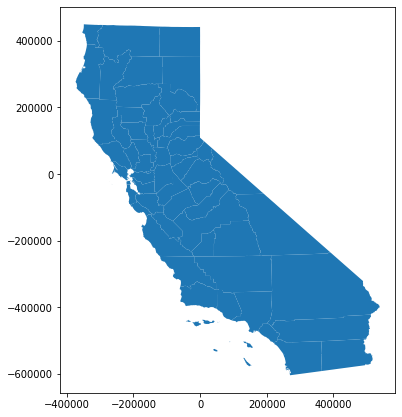

In [13]:
# Make the figure size bigger
counties.plot(figsize=(6,9))

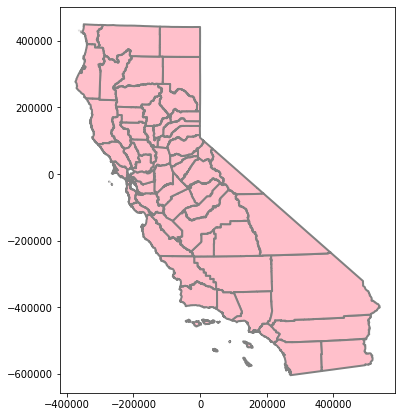

In [14]:
counties.plot(figsize=(6,9), 
              edgecolor='grey',  # grey colored border lines
              facecolor='pink' , # fill in our counties as pink
              linewidth=2)       # make the linedwith a width of 2

## 2.5 Subset the GeoDataframe

Since we'll be focusing on Berkeley later in the workshop, let's subset our GeoDataFrame to just be for Alameda County.

In [15]:
# See all county names included in our dataset
counties['NAME'].values

array(['Kern', 'Kings', 'Lake', 'Lassen', 'Los Angeles', 'Madera',
       'Marin', 'Mariposa', 'Mendocino', 'Merced', 'Modoc', 'Mono',
       'Monterey', 'Napa', 'Nevada', 'Orange', 'Placer', 'Plumas',
       'Riverside', 'Sacramento', 'San Benito', 'San Bernardino',
       'San Diego', 'San Francisco', 'San Joaquin', 'San Luis Obispo',
       'San Mateo', 'Santa Barbara', 'Santa Clara', 'Santa Cruz',
       'Shasta', 'Sierra', 'Siskiyou', 'Solano', 'Alameda', 'Alpine',
       'Sonoma', 'Amador', 'Stanislaus', 'Sutter', 'Butte', 'Calaveras',
       'Tehama', 'Colusa', 'Trinity', 'Tulare', 'Contra Costa',
       'Del Norte', 'Tuolumne', 'Ventura', 'El Dorado', 'Yolo', 'Fresno',
       'Glenn', 'Yuba', 'Humboldt', 'Imperial', 'Inyo'], dtype=object)

It looks like Alameda county is specified as "Alameda" in this dataset.

In [16]:
counties

,FID_,NAME,STATE_NAME,POP2010,POP10_SQMI,POP2012,POP12_SQMI,WHITE,BLACK,AMERI_ES,ASIAN,HAWN_PI,HISPANIC,OTHER,MULT_RACE,MALES,FEMALES,AGE_UNDER5,AGE_5_9,AGE_10_14,AGE_15_19,AGE_20_24,AGE_25_34,AGE_35_44,AGE_45_54,AGE_55_64,AGE_65_74,AGE_75_84,AGE_85_UP,MED_AGE,MED_AGE_M,MED_AGE_F,HOUSEHOLDS,AVE_HH_SZ,HSEHLD_1_M,HSEHLD_1_F,MARHH_CHD,MARHH_NO_C,MHH_CHILD,FHH_CHILD,FAMILIES,AVE_FAM_SZ,HSE_UNITS,VACANT,OWNER_OCC,RENTER_OCC,NO_FARMS07,AVG_SIZE07,CROP_ACR07,AVG_SALE07,SQMI,CountyFIPS,NEIGHBORS,PopNeigh,NEIGHBOR_1,PopNeigh_1,NEIGHBOR_2,PopNeigh_2,geometry
0,0,Kern,California,839631,102.9,851089,104.282870,499766,48921,12676,34846,1252,413033,204314,37856,433108,406523,72885,68694,68473,72493,65339,122046,108500,108479,77285,43502,23473,8462,30.7,30.2,31.4,254610,3.15,23580,25629,74254,58472,12615,28989,191739,3.61,284367,29757,152828,101782,2117.0,1116.0,942827.0,1513.53,8161.35,06103,"San Bernardino,Tulare,Inyo",2495935,None,None,None,None,"POLYGON ((193446.035 -244342.585, 194033.795 -..."
1,0,Kings,California,152982,109.9,155039,111.427421,83027,11014,2562,5620,271,77866,42996,7492,86344,66638,12877,11564,11324,11356,13158,25589,21878,20282,12924,6844,3809,1377,31.1,31.9,30.0,41233,3.19,3313,3884,12993,9299,2115,4818,31939,3.59,43867,2634,22329,18904,1129.0,603.0,512870.0,1203.20,1391.39,06089,"Fresno,Kern,Tulare",2212260,None,None,None,None,"POLYGON ((12524.028 -179431.328, 12358.142 -17..."
2,0,Lake,California,64665,48.6,65253,49.082334,52033,1232,2049,724,108,11088,5455,3064,32469,32196,3633,3574,3888,4190,3362,6603,7095,10255,10625,6553,3502,1385,45.0,43.8,45.9,26548,2.39,3913,3970,4061,7381,926,2051,16255,2.94,35492,8944,17472,9076,845.0,147.0,28997.0,72.31,1329.46,06106,None,0,None,None,None,None,"MULTIPOLYGON (((-240632.150 93056.104, -240669..."
3,0,Lassen,California,34895,7.4,35039,7.422856,25532,2834,1234,356,165,6117,3562,1212,22416,12479,1625,1595,1853,2107,2831,6337,5513,5447,4113,1984,1041,449,37.0,35.5,40.9,10058,2.50,1348,1231,2068,3094,413,710,6800,2.98,12710,2652,6590,3468,459.0,1000.0,82567.0,120.92,4720.42,06086,None,0,None,None,None,None,"POLYGON ((-45364.032 352060.633, -45248.844 35..."
4,0,Los Angeles,California,9818605,2402.3,9904341,2423.264150,4936599,856874,72828,1346865,26094,4687889,2140632,438713,4839654,4978951,645793,633690,678845,753630,752788,1475731,1430326,1368947,1013156,568470,345603,151626,34.8,33.6,35.9,3241204,2.98,360530,424398,790374,690291,115984,296976,2194080,3.58,3445076,203872,1544749,1696455,1734.0,63.0,49158.0,187.94,4087.19,06073,"San Bernardino,Kern",2874841,None,None,None,None,"MULTIPOLYGON (((173874.519 -471855.293, 173852..."
5,0,Madera,California,150865,70.1,153025,71.065672,94456,5629,4136,2802,162,80992,37380,6300,72682,78183,11983,11756,11755,12224,11032,20562,19167,19291,15833,9868,5468,1926,33.1,31.5,34.3,43317,3.28,3342,3909,12660,12558,2056,4020,34093,3.63,49140,5823,27726,15591,1708.0,398.0,290683.0,579.70,2153.29,06102,"Mono,Fresno",944652,None,None,None,None,"MULTIPOLYGON (((16681.213 -129464.838, 16664.1..."
6,0,Marin,California,252409,480.2,255509,486.100489,201963,6987,1523,13761,509,39069,16973,10693,124072,128337,13932,15481,14241,12798,10308,24836,36478,42055,40088,23211,12425,6556,44.5,43.1,46.0,103210,2.36,11939,19807,21859,27800,2295,5405,62653,2.94,111214,8004,64637,38573,255.0,523.0,11973.0,226.94,525.63,06066,None,0,None,None,None,None,"MULTIPOLYGON (((-261758.239 27836.680, -261768..."
7,0,Mariposa,California,18251,12.5,18455,12.613887,16103,138,527,204,26,1676,508,745,9269,8982,775,821,987,1026,827,1651,1828,3232,3283,2253,1186,382,49.2,48.9,49.4,7693,2.28,1116,1072,1175,2856,183,353,4948,2.77,10188,2495,5227,2466,302.0,704.0,4377.0,37.96,1463.07,06111,None,0,None,None,None,None,"POLYGON ((-4613.840 -92628.075, -4877.964 -923..."
8,0,Mendocino,California,87841,25.0,88094,25.083070,67218,622,4277,1450,119,19505,10185,3970,43983,43858,5347,5259,5390,5613,4874,10704,10268,12476,14417,7556,3983,1954,41.6,40.0,43.3,34945,2.46,4782,5600,6044,9412,1345,2649,

Now we can create a new geodataframe called `alameda_county` that is a subset of our counties geodataframe.

In [17]:
alameda_county = counties.loc[counties['NAME'] == 'Alameda'].copy().reset_index(drop=True)

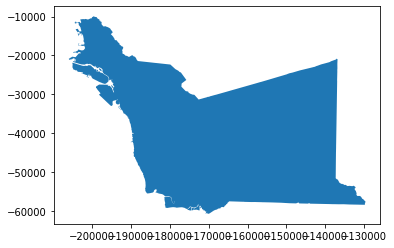

In [18]:
# Plot our newly subsetted geodataframe
alameda_county.plot()

Nice! Looks like we have what we were looking for.

*FYI*: You can also make dynamic plots of one or more county without saving to a new gdf.

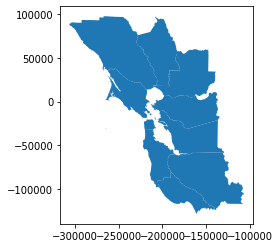

In [19]:
bay_area_counties = ['Alameda', 'Contra Costa', 'Marin', 'Napa', 'San Francisco', 
                        'San Mateo', 'Santa Clara', 'Santa Cruz', 'Solano', 'Sonoma']
counties.loc[counties['NAME'].isin(bay_area_counties)].plot()


## 2.6 Save your Data

Let's not forget to save out our Alameda County geodataframe `alameda_county`. This way we won't need to repeat the processing steps and attribute join we did above.

We can save it as a shapefile.

In [22]:
alameda_county.to_file("alameda_county.shp")

One of the problems of saving to a shapefile is that our column names get truncated to 10 characters (a shapefile limitation.) 

Instead of renaming all columns with obscure names that are less than 10 characters, we can save our GeoDataFrame to a spatial data file format that does not have this limation - [GeoJSON](https://en.wikipedia.org/wiki/GeoJSON) or [GPKG](https://en.wikipedia.org/wiki/GeoPackage) (geopackage) file.
- These formats have the added benefit of outputting only one file in contrast tothe multi-file shapefile format.

In [23]:
alameda_county.to_file("alameda_county.json", driver="GeoJSON")

In [24]:
alameda_county.to_file("alameda_county.gpkg", driver="GPKG")

You can read these in, just as you would a shapefile with `gpd.read_file`

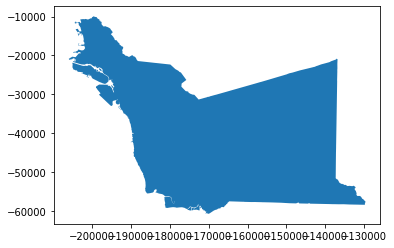

In [25]:
alameda_county_test = gpd.read_file("alameda_county.gpkg")
alameda_county_test.plot()

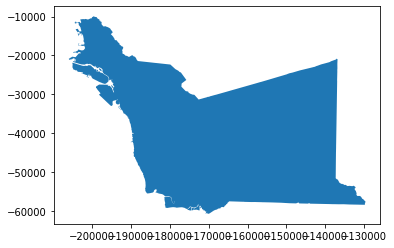

In [26]:
alameda_county_test2 = gpd.read_file("alameda_county.json")
alameda_county_test2.plot()

There are also many other formats we could use for data output.

**NOTE**: If you're working with point data (i.e. a single latitude and longitude value per feature),
then CSV might be a good option!

## 2.7 Recap

In this lesson we learned about...
- The `geopandas` package 
- Reading in shapefiles 
    - `gpd.read_file`
- GeoDataFrame structures
    - `shape`, `head`, `columns`
- Plotting GeoDataFrames
    - `plot`
- Subsetting GeoDatFrames
    - `loc`
- Saving out GeoDataFrames
    - `to_file`

## Exercise: IO, Manipulation, and Mapping

Now you'll get a chance to practice the operations we learned above.

In the following cell, compose code to:

1. Read in the California places data (`notebook_data/census/Places/cb_2018_06_place_500k.zip`)
2. Subset the data to Berkeley
3. Plot, and customize as desired
4. Save out as a shapefile (`outdata/berkeley_places.shp`)


*Note: pulling in a zipped shapefile has the same syntax as just pulling in a shapefile. The only difference is that insead of just putting in the filepath you'll want to write `zip://notebook_data/census/Places/cb_2018_06_place_500k.zip`*

To see the solution, double-click the Markdown cell below.

In [33]:
# YOUR CODE HERE
!unzip /content/cb_2018_06_place_500k.zip -d path_to_directory

Archive:  /content/cb_2018_06_place_500k.zip
  inflating: path_to_directory/cb_2018_06_place_500k.shp.ea.iso.xml  
  inflating: path_to_directory/cb_2018_06_place_500k.shp.iso.xml  
  inflating: path_to_directory/cb_2018_06_place_500k.shp  
  inflating: path_to_directory/cb_2018_06_place_500k.shx  
  inflating: path_to_directory/cb_2018_06_place_500k.dbf  
  inflating: path_to_directory/cb_2018_06_place_500k.prj  
 extracting: path_to_directory/cb_2018_06_place_500k.cpg  


In [34]:
cal_places= gpd.read_file('path_to_directory/cb_2018_06_place_500k.shp')

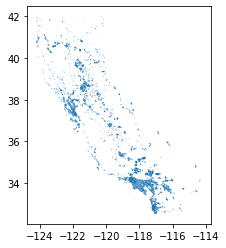

In [35]:
cal_places.plot()


In [36]:
cal_places.shape

(1521, 10)

In [37]:
cal_places.head()

,STATEFP,PLACEFP,PLACENS,AFFGEOID,GEOID,NAME,LSAD,ALAND,AWATER,geometry
0,06,46492,02411054,1600000US0646492,0646492,Maywood,25,3052102,0,"POLYGON ((-118.20416 33.98952, -118.20433 33.9..."
1,06,17750,02410282,1600000US0617750,0617750,Cypress,25,17127728,21850,"POLYGON ((-118.06332 33.83153, -118.06123 33.8..."
2,06,56938,02411418,1600000US0656938,0656938,Piedmont,25,4402167,0,"POLYGON ((-122.24930 37.82372, -122.24812 37.8..."
3,06,69088,02411819,1600000US0669088,0669088,Santa Clarita,25,170638259,162849,"MULTIPOLYGON (((-118.56481 34.35969, -118.5591..."
4,06,13392,02409461,1600000US0613392,0613392,Chula Vista,25,128547314,6380537,"POLYGON ((-117.12399 32.64636, -117.11707 32.6..."


In [38]:
cal_places.columns

Index(['STATEFP', 'PLACEFP', 'PLACENS', 'AFFGEOID', 'GEOID', 'NAME', 'LSAD',
       'ALAND', 'AWATER', 'geometry'],
      dtype='object')

In [39]:
cal_places['geometry'].head()

0    POLYGON ((-118.20416 33.98952, -118.20433 33.9...
1    POLYGON ((-118.06332 33.83153, -118.06123 33.8...
2    POLYGON ((-122.24930 37.82372, -122.24812 37.8...
3    MULTIPOLYGON (((-118.56481 34.35969, -118.5591...
4    POLYGON ((-117.12399 32.64636, -117.11707 32.6...
Name: geometry, dtype: geometry

In [40]:
berkeley = cal_places.loc[cal_places['NAME'] == 'Berkeley'].copy().reset_index(drop=True)

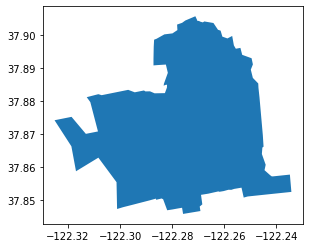

In [41]:
berkeley.plot()


In [42]:
cal_places['NAME']

0             Maywood
1             Cypress
2            Piedmont
3       Santa Clarita
4         Chula Vista
            ...      
1516     Cameron Park
1517        Fallbrook
1518           Tecopa
1519             Yolo
1520          Oildale
Name: NAME, Length: 1521, dtype: object

In [43]:
berkeley.to_file('berkeley.shp')

In [44]:
berkeley.to_file("berkeley.json", driver="GeoJSON")

In [46]:
berkeley.to_file("berkeley.gpkg", driver="GPKG")

## Double-click to see solution!

<!--
# SOLUTION

# 1. Read in the California places data 
california_places = gpd.read_file('zip://notebook_data/census/Places/cb_2018_06_place_500k.zip')
california_places.head()

# 2. Subset the data to Berkeley
berkeley_places = california_places.loc[california_places['NAME']=='Berkeley'].copy().reset_index(drop=True)

# 3. Plot and customize
berkeley_places.plot(edgecolor='grey', color='lightgreen')

# 4. Save to a shapefile
berkeley_places.to_file("outdata/berkeley_places.shp")

-->

---
<div style="display:inline-block;vertical-align:middle;">
<a href="https://dlab.berkeley.edu/" target="_blank"><img src ="assets/images/dlab_logo.png" width="75" align="left">
</a>
</div>

<div style="display:inline-block;vertical-align:middle;">
    <div style="font-size:larger">&nbsp;D-Lab @ University of California - Berkeley</div>
    <div>&nbsp;Team Geo<div>
</div>
        

